In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
projectdata = pd.read_csv('project2.data')


In [4]:
projectdata.head

<bound method NDFrame.head of                     class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  


In [5]:
projectdata.size

2860

In [6]:
projectdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [7]:
missing_data = projectdata.isnull().sum()

In [8]:
print(missing_data)

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


### There is no missing data or invalid values from the dataset

In [9]:
projectdata.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [10]:
projectdata['deg-malig'] = projectdata['deg-malig'].astype(object)

In [11]:
projectdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    object
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


### Visualize the dataset through different univariate analysis and comment on your observations

<Axes: xlabel='age', ylabel='Count'>

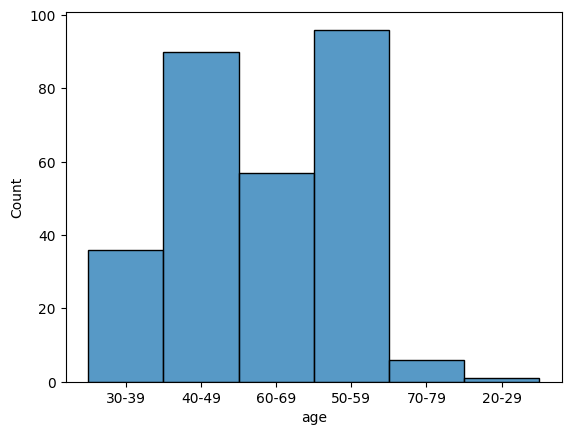

In [12]:
sns.histplot(data=projectdata['age'] )

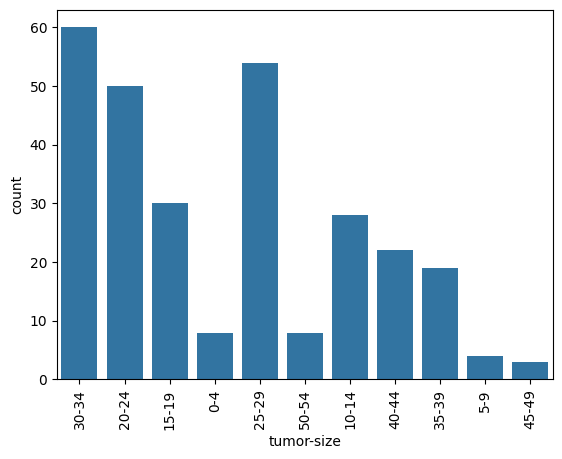

In [13]:
sns.countplot(x=projectdata['tumor-size'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='deg-malig'>

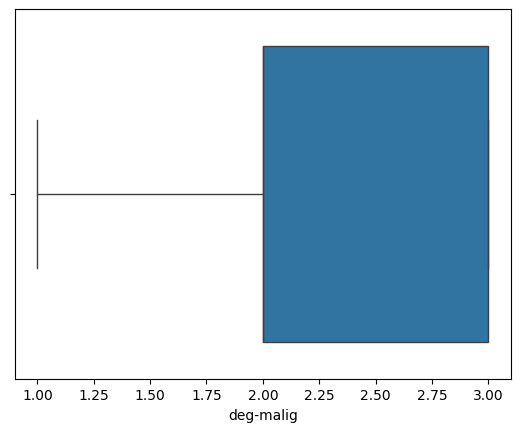

In [14]:
sns.boxplot(data=projectdata, x='deg-malig')

In [15]:
project2_one_hot_encoded = pd.get_dummies(projectdata, columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'])
print(project2_one_hot_encoded.head())

                  class deg-malig  age_20-29  age_30-39  age_40-49  age_50-59  \
0  no-recurrence-events         3      False       True      False      False   
1  no-recurrence-events         2      False      False       True      False   
2  no-recurrence-events         2      False      False       True      False   
3  no-recurrence-events         2      False      False      False      False   
4  no-recurrence-events         2      False      False       True      False   

   age_60-69  age_70-79  menopause_ge40  menopause_lt40  ...  breast_left  \
0      False      False           False           False  ...         True   
1      False      False           False           False  ...        False   
2      False      False           False           False  ...         True   
3       True      False            True           False  ...        False   
4      False      False           False           False  ...        False   

   breast_right  breast-quad_?  breast-quad_centra

#### One-hot encoding  on categorical variable, that show 

In [16]:
X = projectdata.drop(['class'], axis=1)  
y = projectdata['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [17]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 9)
X_test shape: (86, 9)
y_train shape: (200,)
y_test shape: (86,)


### K-Nearest Neighbor Classifier

In [18]:
# Combine training and testing data
combined_projectdata = pd.concat([X_train, X_test])

# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
combined_projectdata_encoded = encoder.fit_transform(combined_projectdata)

X_train_projectdata_encoded = combined_projectdata_encoded[:len(X_train)]
X_test_projectdata_encoded = combined_projectdata_encoded[len(X_train):]

# Initialize and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_projectdata_encoded, y_train)

accuracy_test = accuracy_score(y_test, knn.predict(X_test_projectdata_encoded))
print('Accuracy of knn on test data is: {:.2f}'.format(accuracy_test))

accuracy_train = accuracy_score(y_train, knn.predict(X_train_projectdata_encoded))
print('Accuracy of knn on train data is: {:.2f}'.format(accuracy_train))


Accuracy of knn on test data is: 0.79
Accuracy of knn on train data is: 0.82


### Decision Trees Classifier

In [19]:

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=1)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=1)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = dt_classifier.predict(X_test)
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


Accuracy: 0.6744186046511628
Performance on TEST
*******************
                      precision    recall  f1-score   support

no-recurrence-events       0.74      0.83      0.78        60
   recurrence-events       0.44      0.31      0.36        26

            accuracy                           0.67        86
           macro avg       0.59      0.57      0.57        86
        weighted avg       0.65      0.67      0.65        86

Performance on TRAIN
********************
                      precision    recall  f1-score   support

no-recurrence-events       0.96      1.00      0.98       141
   recurrence-events       1.00      0.90      0.95        59

            accuracy                           0.97       200
           macro avg       0.98      0.95      0.96       200
        weighted avg       0.97      0.97      0.97       200



[Text(0.7879660087719298, 0.9705882352941176, 'x[29] <= 0.5\ngini = 0.416\nsamples = 200\nvalue = [141, 59]'),
 Text(0.6899671052631579, 0.9117647058823529, 'x[10] <= 0.5\ngini = 0.34\nsamples = 161\nvalue = [126, 35]'),
 Text(0.6724232456140351, 0.8529411764705882, 'x[24] <= 0.5\ngini = 0.375\nsamples = 140\nvalue = [105, 35]'),
 Text(0.6080043859649122, 0.7941176470588235, 'x[35] <= 0.5\ngini = 0.349\nsamples = 129\nvalue = [100, 29]'),
 Text(0.5904605263157895, 0.7352941176470589, 'x[7] <= 0.5\ngini = 0.342\nsamples = 128\nvalue = [100, 28]'),
 Text(0.5142543859649122, 0.6764705882352942, 'x[30] <= 0.5\ngini = 0.329\nsamples = 125\nvalue = [99, 26]'),
 Text(0.4144736842105263, 0.6176470588235294, 'x[15] <= 0.5\ngini = 0.372\nsamples = 89\nvalue = [67, 22]'),
 Text(0.3201754385964912, 0.5588235294117647, 'x[13] <= 0.5\ngini = 0.353\nsamples = 83\nvalue = [64, 19]'),
 Text(0.18421052631578946, 0.5, 'x[34] <= 0.5\ngini = 0.305\nsamples = 64\nvalue = [52, 12]'),
 Text(0.0877192982456140

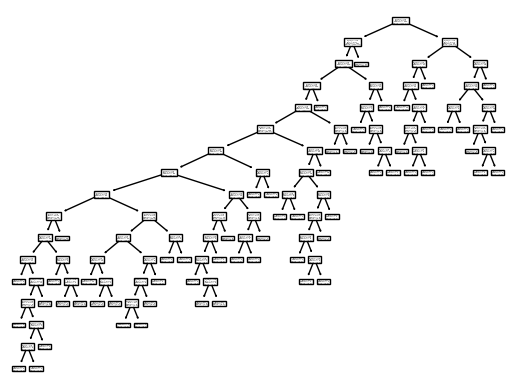

In [20]:
tree.plot_tree(model)

### Logistic Regression 

In [25]:
model = gscv.best_estimator_
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'